## Introducción al manejo de datos faltantes en pandas

Como científico de datos, es muy común encontrarse con **datos faltantes** en los conjuntos de datos. Esto significa que recibirás un DataFrame con valores ausentes, por lo que es fundamental saber cómo identificarlos y manejarlos adecuadamente.

La mayoría de los datos reales no son perfectos: casi siempre existe la posibilidad de que falte alguna pieza de información en tu dataset.

En pandas, los valores faltantes se representan mediante `NaN` (**Not a Number**). Cuando obtienes un DataFrame por primera vez, es una buena práctica verificar si contiene valores faltantes y, si es así, cuántos hay.

### ¿Cómo identificar valores faltantes?

Aquí es donde entra en juego el método `isna()` de pandas. Este método devuelve un DataFrame del mismo tamaño que el original, pero con valores booleanos (`True` o `False`) que indican si cada celda es `NaN` o no.

```python
df.isna()
```

Esto genera un DataFrame donde cada valor es `True` si está ausente (`NaN`) y `False` si está presente.

> **Consejo:**
> Para saber cuántos valores faltantes hay por columna, puedes usar:
> ```python
> df.isna().sum()
> ```

---

**Resumen:**
- Los valores faltantes son comunes en ciencia de datos.
- pandas representa los valores faltantes como `NaN`.
- Usa `isna()` para identificar los valores ausentes en tu DataFrame.

In [3]:
import pandas as pd
laptop = pd.read_csv("../data/laptop.csv")
 # Si encadenamos el metodo isna() con el metodo any(), podemos ver si hay algun valor faltante en cada columna del DataFrame.
laptop.isna().any()

Unnamed: 0    False
Model         False
Price         False
Rating         True
Generation    False
Core          False
Ram           False
SSD           False
Display        True
Graphics      False
OS             True
Warranty       True
dtype: bool

In [4]:
# Tambien podemos usar el metodo isna() con el metodo sum() para ver cuantas filas faltantes hay en cada columna.
laptop.isna().sum()

Unnamed: 0      0
Model           0
Price           0
Rating        152
Generation      0
Core            0
Ram             0
SSD             0
Display         1
Graphics        0
OS              1
Warranty        5
dtype: int64

Podemos utilizar esos recuentos para visualizar los datos que faltan en el conjunto de datos utilizando un diagrama de barras.


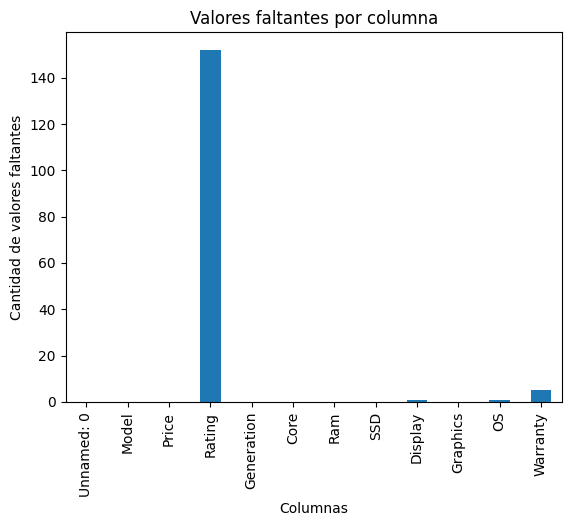

In [6]:
import matplotlib.pyplot as plt
laptop.isna().sum().plot(kind='bar')
plt.title("Valores faltantes por columna")
plt.xlabel("Columnas")
plt.ylabel("Cantidad de valores faltantes")
plt.show()

## Estrategias para manejar valores perdidos en pandas

Cuando identificas **valores perdidos** en tu conjunto de datos, es importante decidir cómo tratarlos antes de continuar con el análisis. Existen varias estrategias comúnmente utilizadas en pandas:

### 1. Eliminar filas o columnas con valores perdidos

Puedes eliminar las filas (o columnas) que contienen valores perdidos usando el método `dropna()`:

```python
laptop.dropna()  # Elimina filas con valores perdidos
```

> **Advertencia:**
> Eliminar datos puede ser riesgoso si hay muchos valores perdidos, ya que podrías perder información relevante y reducir significativamente el tamaño de tu dataset.

---

### 2. Sustituir los valores perdidos por otro valor

Otra opción es reemplazar los valores perdidos con un valor específico, como un número, el promedio, la mediana, o incluso un texto:

```python
laptop.fillna(0)  # Sustituye los valores perdidos por 0
```

> **Consejo:**
> En lugar de usar siempre un 0, considera utilizar un valor más representativo dependiendo del contexto de tus datos. Por ejemplo, puedes usar la media de la columna:
> ```python
> laptop.fillna(laptop['precio'].mean())
> ```

---

**Resumen de estrategias:**
- **Eliminar:** `dropna()` — útil si la cantidad de valores perdidos es baja.
- **Sustituir:** `fillna(valor)` — recomendable si quieres conservar la mayor cantidad de datos posible.

Antes de elegir una estrategia, analiza la cantidad y el patrón de los valores perdidos para tomar la mejor decisión según tu problema.